# Mobility Pattern Insights
This project aims to analyze urban mobility pattern, with the main objective to gain insights into how various factors—such as public transport usage, traffic flow, bike-sharing, and pedestrian counts—shape mobility behaviors in urban areas.

Using data analysis techniques, we aim to uncover trends and patterns within the mobility data that can inform future urban planning and enhance the understanding of transportation dynamics in the city.

In [1]:
# Import libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data into a DataFrame
df = pd.read_csv('urban_mobility_dataset.csv')

# Display DataFrame head
display(df.head())

# Print DataFrame dimensions
print("\nDataframe dimensions:")
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print(df.info())

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3



Dataframe dimensions:
Number of rows:  1000000
Number of columns:  15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   timestamp               1000000 non-null  object 
 1   public_transport_usage  1000000 non-null  int64  
 2   traffic_flow            1000000 non-null  int64  
 3   bike_sharing_usage      1000000 non-null  int64  
 4   pedestrian_count        1000000 non-null  int64  
 5   weather_conditions      1000000 non-null  object 
 6   day_of_week             1000000 non-null  object 
 7   holiday                 1000000 non-null  int64  
 8   event                   200513 non-null   object 
 9   temperature             1000000 non-null  float64
 10  humidity                1000000 non-null  int64  
 11  road_incidents          1000000 non-null  int64  
 12  public_transport_delay  1000000 non-null  

In [8]:
# We look at the descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
public_transport_usage,1000000.0,274.474218,129.995532,50.000000,162.000000,274.000000,387.000000,499.000000
traffic_flow,1000000.0,2550.395132,1414.950298,100.000000,1325.000000,2553.000000,3776.000000,4999.000000
bike_sharing_usage,1000000.0,149.452101,86.651081,0.000000,74.000000,149.000000,225.000000,299.000000
pedestrian_count,1000000.0,1009.578256,571.420226,20.000000,514.000000,1009.000000,1504.000000,1999.000000
holiday,1000000.0,0.100026,0.300035,0.000000,0.000000,0.000000,0.000000,1.000000
temperature,1000000.0,12.495904,12.977562,-9.999905,1.260966,12.516094,23.722075,34.999970
humidity,1000000.0,59.489778,23.093081,20.000000,39.000000,60.000000,80.000000,99.000000
road_incidents,1000000.0,4.500242,2.872511,0.000000,2.000000,5.000000,7.000000,9.000000
public_transport_delay,1000000.0,15.015072,8.658225,0.000007,7.515728,15.023693,22.497112,29.999995
bike_availability,1000000.0,49.447692,28.874047,0.000000,24.000000,49.000000,74.000000,99.000000


In [9]:
# Check data for missing values
print("Number of instances with missing values:")
print(df.isnull().sum())

Number of instances with missing values:
timestamp                      0
public_transport_usage         0
traffic_flow                   0
bike_sharing_usage             0
pedestrian_count               0
weather_conditions             0
day_of_week                    0
holiday                        0
event                     799487
temperature                    0
humidity                       0
road_incidents                 0
public_transport_delay         0
bike_availability              0
pedestrian_incidents           0
dtype: int64


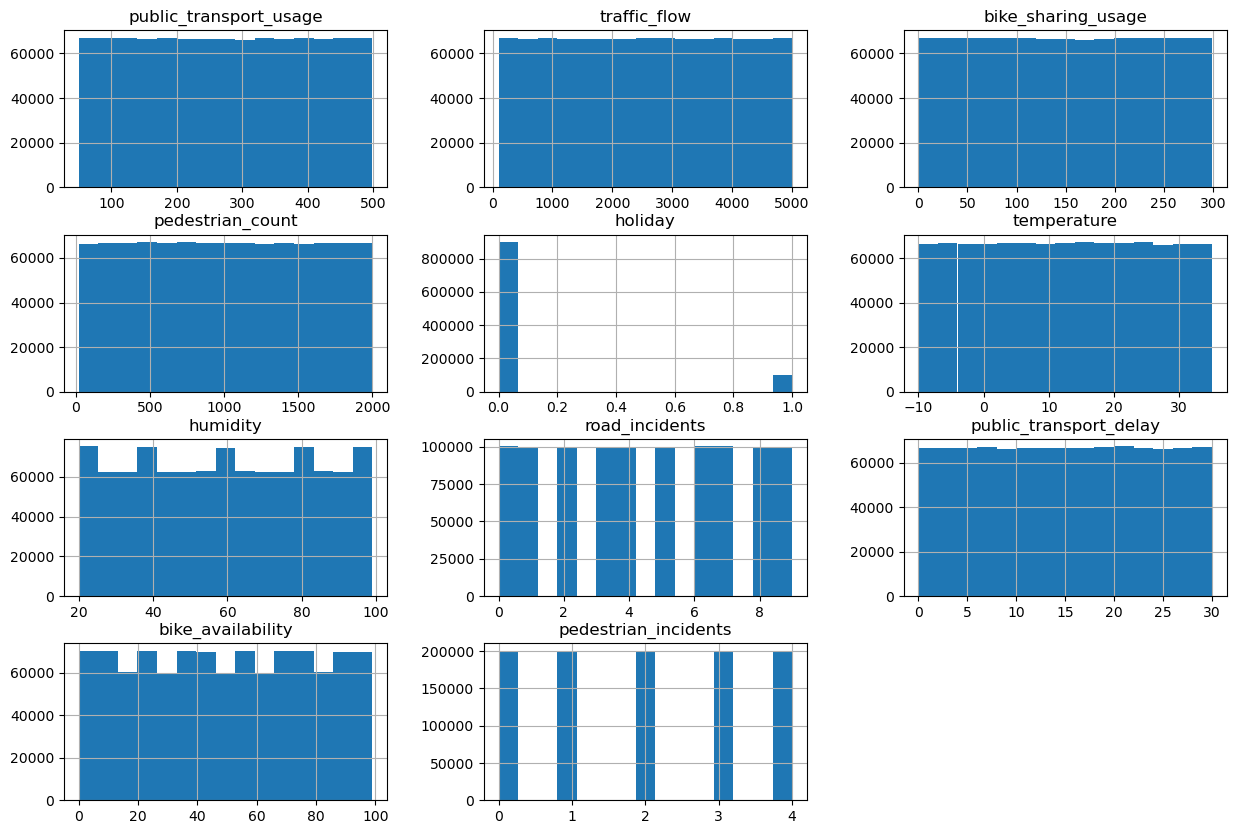

In [10]:
# Plot the distribution of the numerical values of the dataset
df.hist(bins=15, figsize=(15,10))
plt.show()

In [7]:
dataTime = pd.DataFrame()

dataTime['timestamp'] = pd.to_datetime(df['timestamp'])
dataTime['date'] = dataTime['timestamp'].dt.date
dataTime['time'] = dataTime['timestamp'].dt.time

display(dataTime)

,timestamp,date,time
0,2023-01-01 00:00:00,2023-01-01,00:00:00
1,2023-01-01 01:00:00,2023-01-01,01:00:00
2,2023-01-01 02:00:00,2023-01-01,02:00:00
3,2023-01-01 03:00:00,2023-01-01,03:00:00
4,2023-01-01 04:00:00,2023-01-01,04:00:00
...,...,...,...
999995,2137-01-29 11:00:00,2137-01-29,11:00:00
999996,2137-01-29 12:00:00,2137-01-29,12:00:00
999997,2137-01-29 13:00:00,2137-01-29,13:00:00
999998,2137-01-29 14:00:00,2137-01-29,14:00:00


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['traffic_flow'], label='Cars')
plt.plot(df['timestamp'], df['public_transport_usage'], label='Public Transport Users')
plt.plot(df['timestamp'], df['bike_sharing_usage'], label='Bike-sharing Users')
plt.plot(df['timestamp'], df['pedestrian_count'], label='Pedestrians')
plt.xlabel('Date and Time')
plt.ylabel('count/hr')
plt.title('Mobility Patterns Over Time')
plt.legend()
plt.show()